In [1]:
from __future__ import print_function
import numpy as np
from scipy import stats
import os
import json
import pylab as pl
s = json.load(open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json'));
pl.rcParams.update(s)

import matplotlib
%matplotlib nbagg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


##SIMULATED DATA: A SINE WAVE WITH A PERIOD OF 2$\pi$/10 . 
 #WHAT DOES IT LOOK LIKE IN FOURIER SPACE?

PERIOD =  0.25


Text(0.5,1,'signal')

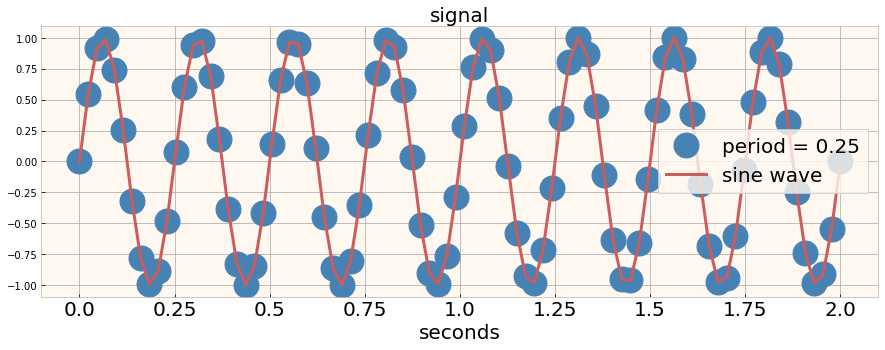

In [2]:
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)

sample_rate = 44
duration = 2

N = duration * sample_rate
freq = 8 / duration
period = 1.0 / freq

print ("PERIOD = ", period)
x = np.linspace(0, duration, num = N)
sinewave = np.sin(2 * np.pi * freq * x)
ax.plot(x, sinewave, '.', ms=50, label= "period = %.2f"%period);
ax.plot(x, sinewave, '-', label = "sine wave");
ax.legend(fontsize = 20)
ax.set_xticklabels(ax.get_xticks(), fontsize=20)
pl.xlabel("seconds", fontsize=20)
pl.title("signal", fontsize=20)

Text(0.5,1,'Power Spectrum')

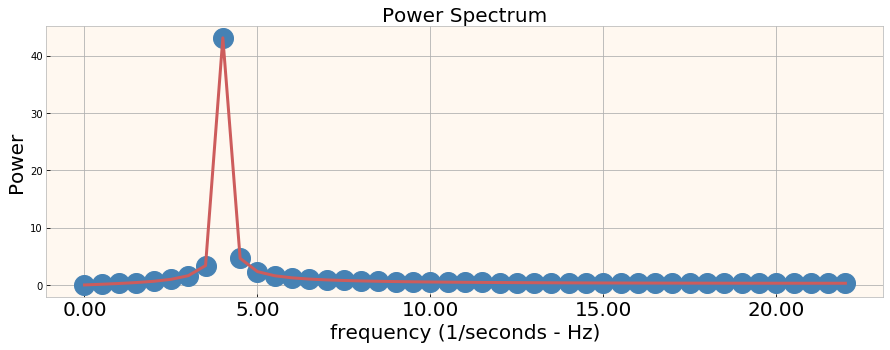

In [3]:
f = np.abs(np.fft.rfft(sinewave))


fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), (f), '-')

ax.set_xticklabels([ "%.2f"%(f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("frequency (1/seconds - Hz)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Power Spectrum", fontsize=20)

USE numpy.fft.rfft to take the fourier transform of the REAL part of your data (always real for us in time series) only 

//anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,0,'frequency [0, ... , 1/(2-i)*sample_rate] Hz')

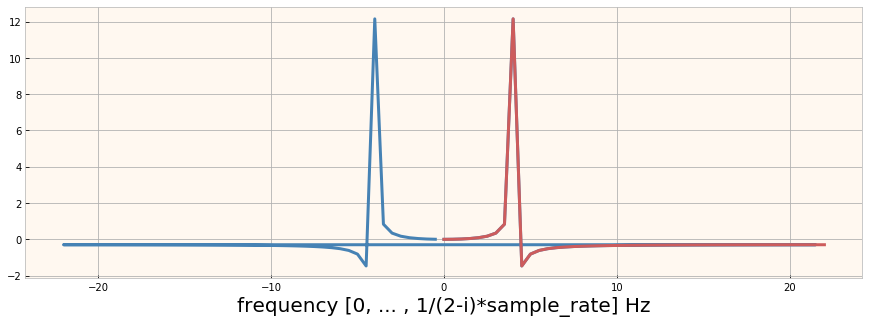

In [4]:

f = np.fft.fft(sinewave)

fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.fftfreq(N, 1.0/sample_rate), f)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), np.fft.rfft(sinewave))
pl.xlabel("frequency [0, ... , 1/(2-i)*sample_rate] Hz", fontsize=20)

take the absolute value of the FFT to suppress imaginary terms and get a positive POWER

[  1.98729921e-14   1.22012321e-01   2.56100914e-01   4.18618951e-01
   6.38103783e-01   9.76902210e-01   1.61361023e+00   3.37725495e+00
   4.31285105e+01   4.64333065e+00]


Text(0.5,0,'frequency [0, ... , 1/(2-i)*sample_rate] Hz')

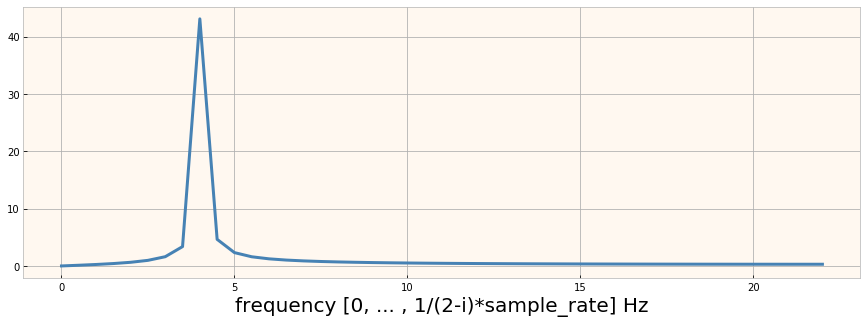

In [5]:
f = np.abs(np.fft.rfft(sinewave))
print (f[:10])
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), f)
pl.xlabel("frequency [0, ... , 1/(2-i)*sample_rate] Hz", fontsize=20)

In [19]:
import pandas as pd
import statsmodels as sm
from statsmodels import tsa
dta = sm.datasets.sunspots.load_pandas().data

trash = dta 

#trash = pd.read_csv("nyc_weekly_refuse.csv")
trash.head()
trash.describe()

,YEAR,SUNACTIVITY
count,309.000000,309.000000
mean,1854.000000,49.752104
std,89.344838,40.452595
min,1700.000000,0.000000
25%,1777.000000,16.000000
50%,1854.000000,40.000000
75%,1931.000000,69.800000
max,2008.000000,190.200000


PERIOD =  1.0


Text(0,0.5,'Tons of trash')

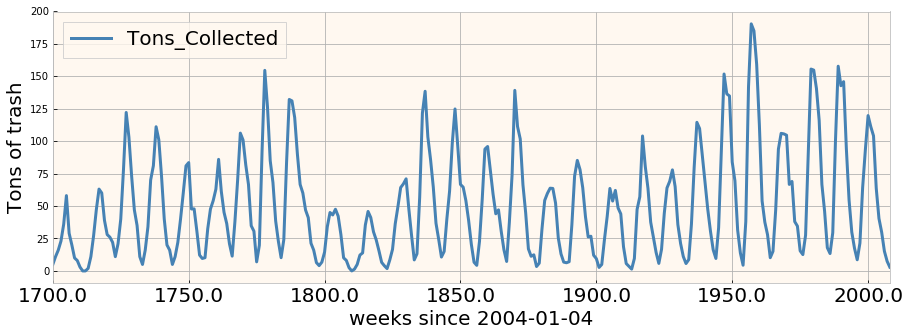

In [24]:
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
N = len(trash)
period = 1.
sampling_rate= np.pi/period
print ("PERIOD = ", period)
trash.rename(columns={"YEAR":"Dump_Time_Stamp"}, inplace=True)
trash.rename(columns={"SUNACTIVITY":"Tons_Collected"}, inplace=True)
ax = trash.plot(x='Dump_Time_Stamp', y='Tons_Collected', ax=ax)
#ax = trash.plot(x='Dump_Time_Stamp', y='Tons_Collected', ax=ax)
#ax.plot(trash.Dump_Time_Stamp, trash.Tons_Collected, '.', ms=50, label= "period = ?");
#ax.plot(trash.Dump_Time_Stamp, trash.Tons_Collected, '-', label = "trash pickup");
ax.legend(fontsize = 20)
ax.set_xticklabels(ax.get_xticks(), fontsize=20)
pl.xlabel("weeks since 2004-01-04", fontsize=20)
pl.ylabel("Tons of trash", fontsize=20)


//anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning:

Casting complex values to real discards the imaginary part



Text(0.5,0,'frequency (1/seconds - Hz)')

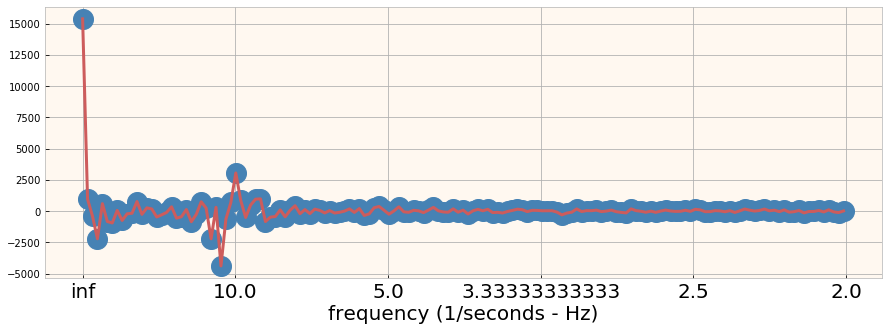

In [25]:
f = np.fft.rfft(trash.Tons_Collected)
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0), (f), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("frequency (1/seconds - Hz)", fontsize=20)

[  inf  309.]
[ 2.03289474  2.01960784]


Text(0.5,1,'Trash pickup power spectrum')

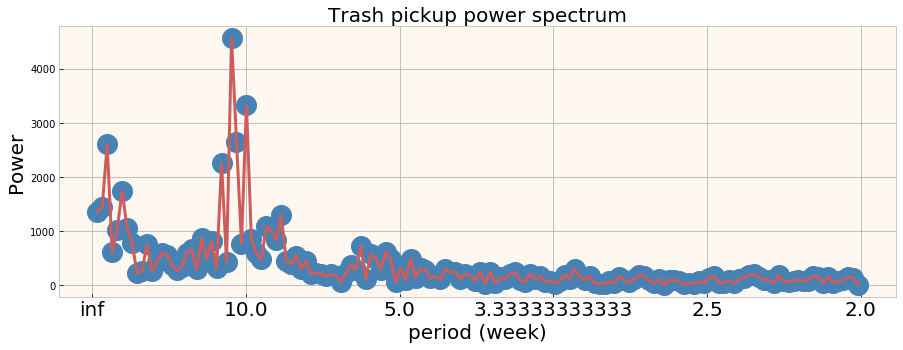

In [26]:
f = np.abs(np.fft.rfft(trash.Tons_Collected))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
print (1.0/np.fft.rfftfreq(N, 1.0)[0:2])
print (1.0/np.fft.rfftfreq(N, 1.0)[-3:-1])
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (week)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Trash pickup power spectrum", fontsize=20)

[  inf  309.]
[ 2.03289474  2.01960784]


Text(0.5,1,'Trash pickup power spectrum')

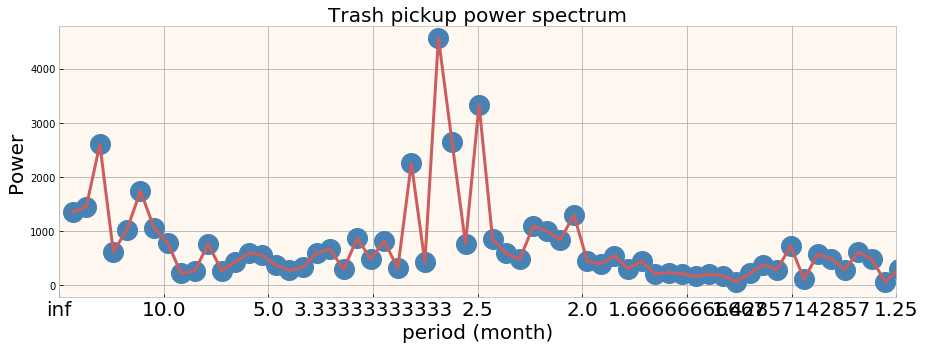

In [28]:
f = np.abs(np.fft.rfft(trash.Tons_Collected))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
print (1.0/np.fft.rfftfreq(N, 1.0)[0:2])
print (1.0/np.fft.rfftfreq(N, 1.0)[-3:-1])
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
ax.set_xlim(0,1.0/5)
ax.set_xticklabels([ "%s"%(1/4./f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (month)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Trash pickup power spectrum", fontsize=20)